# **What is Mixture Of Experts ?**

The concept of Mixture-of-Experts (MoE) is an ensemble learning technique that originated in artificial neural networks. It involves training individual expert models on specific subtasks of a complex predictive modeling problem.

In contrast to traditional ensemble methods where all models are trained on the same dataset, and their outputs are combined through averaging or voting, Mixture-of-Experts takes a different approach. Here, each expert model in the ensemble is trained only on a subset of data where it can achieve optimal performance. This specialized training narrows the focus of each expert, contributing to a more nuanced and effective overall model.

# **Mixture of Experts in the Context of Transformer Models**

In the context of transformer models, a MoE consists of two main elements:

1. **Sparse MoE layers:** These replace dense feed-forward network (FFN) layers. MoE layers have a specific number of "experts" (e.g., 8), where each expert is a neural network. While experts are typically FFNs in practice, they can also be more complex networks or even form a hierarchical MoE.

2. **Gate network or router:** This component determines which tokens are sent to which expert. For example, in the image below, the token "More" is sent to the second expert, and "Parameters" is sent to the first network. Routing decisions, a significant aspect of working with MoEs, involve the router composed of learned parameters, pretrained concurrently with the rest of the network.


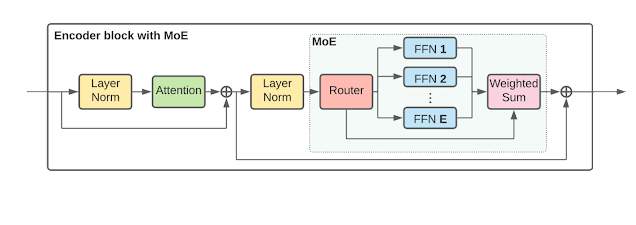

*Google Research. (2022). Scaling vision with sparse mixture of experts [Blog post]. Retrieved from https://blog.research.google/2022/01/scaling-vision-with-sparse-mixture-of.html?m=1*

# **Why do we need MOE ?**


Model scale significantly impacts model quality. When faced with a fixed computing budget, it's more effective to train a larger model for fewer steps than a smaller model for more steps.

Mixture of Experts (MoE) allows for more efficient pretraining with reduced compute requirements. This enables substantial scaling of the model or dataset size within the same compute budget as a dense model. Notably, during pretraining, a MoE model should attain the same quality as its dense counterpart but in a considerably shorter time frame.

# **Sparsity in MOE**

The challenge with Mixture of Experts (MoE) lies in the computational expense associated with employing numerous experts. To address this, the concept of sparsity or conditional computation is utilized.

The concept of sparsity relies on conditional computation, deviating from dense models where all parameters act on every input. Instead, in sparsity, specific parts of the system are selectively activated, facilitating scalability without a proportional increase in computation. Shazeer's exploration of Mixture of Experts (MoEs) for translation involved incorporating thousands of experts in each MoE layer, posing challenges such as uneven batch sizes.

To address this issue, a learned gating network (G) dictates which experts (E) process a portion of the input:
$$[ y = \sum_{i=1}^{n} G(x)_i \cdot E_i(x) ]
$$
Here, all experts run for every input, but if the gating function G is 0, the corresponding expert operations are skipped, optimizing computation. A common gating function involves a straightforward network with a softmax function:
$$
[ G(x)_i = \text{Softmax}(x \cdot W_g)_i ]
$$
There are also other alternative gating mechanisms like Noisy Top-k Gating, introducing tunable noise and selecting the top k values:
$$
[ H(x)_i = (x \cdot W_g)_i + \text{StandardNormal()} \cdot \text{Softplus}((x . W_{\text{noise}})_i) ]
$$
$$
[ G(x) = \text{Softmax}(\text{KeepTopK}(H(x), k)) ]
$$
This sparsity property enables faster training and inference with a low k value, offering an efficient alternative to activating numerous experts. The initial rationale for routing to more than one expert was to enable the gate to learn diverse routing strategies, necessitating the selection of at least two experts.



# **Load Balancing Tokens for MOE**

If a few popular experts receive all tokens, it can lead to inefficient training. In typical Mixture of Experts (MoE) training, the gating network tends to favor activating the same few experts, creating a self-reinforcing pattern as these favored experts are trained faster and selected more frequently. To address this issue, an auxiliary loss is introduced to encourage equal importance among all experts. This additional loss ensures that each expert receives roughly an equal number of training examples. Subsequent sections will delve into the concept of expert capacity, setting a limit on how many tokens an expert can process. In transformer models, the auxiliary loss is exposed through the aux_loss parameter.



**When to use Sparse MoEs vs Dense Models?**

1. **Sparse MoEs:**
   - *High Throughput Scenarios:* Sparse MoEs are advantageous in situations with high throughput and the involvement of many machines.
   - *Fixed Compute Budget for Pretraining:* When there's a fixed compute budget for pretraining, opting for a sparse model is more optimal.

2. **Dense Models:**
   - *Low Throughput Scenarios:* Dense models are preferable in scenarios with low throughput and limited VRAM (Video Random Access Memory).
   - *Limited VRAM:* In situations where there is minimal VRAM available, a dense model is a better choice.

*Note: Directly comparing the number of parameters between sparse and dense models is not meaningful, as both represent significantly different aspects of the models. The decision should be based on the specific computational and performance requirements of the given scenario.*


# **Making MOEs more Practical**
The initial MoE work presented MoE layers as a branching setup, leading to slow computation as GPUs are not designed for it and leading to network bandwidth becoming a bottleneck as the devices need to send info to others

Parallelism

Let's briefly review different forms of parallelism:

1. **Data Parallelism:**
   - The same weights are replicated across all cores.
   - Data is partitioned across cores.

2. **Model Parallelism:**
   - The model is partitioned across cores.
   - Data is replicated across cores.

3. **Model and Data Parallelism:**
   - Both the model and data are partitioned across cores.
   - Different cores process different batches of data.

4. **Expert Parallelism:**
   - Experts are placed on different workers.
   - When combined with data parallelism, each core has a different expert, and data is partitioned across all cores.

In expert parallelism, each worker handles a distinct batch of training samples, and for non-MoE layers, it behaves similarly to data parallelism. However, for MoE layers, tokens in the sequence are sent to workers where the desired experts are located. This approach aims to enhance the efficiency of MoE models during training and inference.

# **Some Examples of MOEs**

## Open Source Projects for Training MoEs

1. **Megablocks:** [GitHub](https://github.com/stanford-futuredata/megablocks)

2. **Fairseq:** [GitHub](https://github.com/facebookresearch/fairseq/tree/main/examples/moe_lm)

3. **OpenMoE:** [GitHub](https://github.com/XueFuzhao/OpenMoE)

## Released Open Access MoEs

- **Switch Transformers (Google):**
  - Collection of T5-based MoEs ranging from 8 to 2048 experts.
  - The largest model has 1.6 trillion parameters.

- **NLLB MoE (Meta):**
  - A MoE variant of the NLLB translation model.

- **OpenMoE:**
  - A community effort that has released Llama-based MoEs.

- **Mixtral 8x7B (Mistral):**
  - A high-quality MoE that outperforms Llama 2 70B and has much faster inference.
  - An instruct-tuned model is also released. Read more about it in the [announcement blog post](#).


## **Mixtral 8\*7B**

## Mixtral 8*7b: A Versatile and Efficient Model by Mistral AI

Mixtral 8*7b, a variant of Mixtral, stands out as a powerful and adaptable model developed by Mistral AI, a company dedicated to open-source models for natural language processing and computer vision.

### Architecture Overview

Mixtral employs a sparse mixture of experts network, where smaller models (experts) specialize in tasks like text summarization and image captioning. These experts are connected by a feedforward block, processing user input through all experts to produce the output.

### Advantages and Challenges

The architecture offers efficiency and scalability with fewer parameters and reduced computation compared to a single large model. However, challenges include selecting appropriate experts, balancing speed and accuracy, and handling extended input sequences.

### Innovative Approach: vLLM

Mixtral 7*8b addresses challenges with vLLM (vocabulary-based Llama-like Model). It uses a vocabulary to select relevant experts, employs attention mechanisms to focus on crucial input elements, and supports multiple languages with distinct vocabularies.

### Key Features

- **Parameters and Tokens:** 7 billion parameters and 8 billion tokens, determining model processing and representing text or image units.
- **Training Data:** Large-scale dataset from the web with billions of examples from diverse sources.
- **Capabilities:** Tasks include text summarization, image captioning, question answering, code generation, sentiment analysis, etc.
- **Performance:** Matches or outperforms Llama 2 70B across benchmarks.
- **Coding Abilities:** Natural coding capabilities for generating code snippets.
- **Sequence Length:** Handles up to a 32k sequence length.

### Usability

- **Access:** Through Mistral's API for easy usage without local installation.
- **Deployment:** Self-deployable (Apache 2.0 licensed) using Skypilot for cloud deployment.

> Note - You can check out this model on this link https://sdk.vercel.ai/



# **References**
1. https://huggingface.co/blog/moe#what-is-a-mixture-of-experts-moe

2. https://mistral.ai/news/mixtral-of-experts/


